# Report 1: Theft Over Open Data Unfiltered (TOODU)

> This file is intended to be used as a references for the first 2 sections of the
> assessment, but does not need to comform with exact requirements. Creativity and innovation are encouraged for this and other sections moving forward.

**What is the purpose of this file?**

This notebook will be covering the first 2 parts of the assignment namely going over the following:
1. **Data Exploration** - Of the Theft Over Open Data Unfiltered (TOODU) dataset.
2. **Data Modeling** - Using the explored data, we will continue with data transformations, training and testing the model, alongside others.

## Data Exploration

Going into detail over what is expected from the data exploration section, we will need to provide a complete review and analysis of the dataset, including but not limited to:
1. Loading and describing the columns, with datatypes and descriptions, etc.
2. Statistical assessment including means, averages, and correlations.
3. Missing data evaluations and imputations.
4. Graphing and visualization of the data using `matplotlib` and `seaborn`.

## Data Modeling

For this section, going into detail over what is expected from the data modeling section, we will need to do the following:
1. Data transformations - handling missing data, categorical data, etc.
2. Feature selection using `sklearn` and `pandas`.
3. Model training and testing using `sklearn` and `pandas`.
4. Managing imbalanced data using `sklearn` and `pandas`.

**NOTE**: Provided below is a notebook that includes the above sections, toroughly covering all aspects of the fist 2 sections of this assessment. When required, there will be additional information and insights throughout the notebook to help understand the specifics of the data.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #  NOTE: Our model for classification
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import SelectFromModel, mutual_info_regression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [33]:
DEFAULT_DATA_PATH = os.path.join(os.pardir, os.pardir, "data")
SAMPLED_DATA_PATH = os.path.join(DEFAULT_DATA_PATH, "Sampled")

toodu_df = pd.read_csv(os.path.join(DEFAULT_DATA_PATH, "Theft_Over_Open_Data_Filtered.csv"))

In [34]:
# Exploration Alpha: going through the toodu_df dataframe.
toodu_df.head()

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-20141264862,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,23,...,Theft Over,Theft Over,156,Bendale-Glen Andrew (156),127,Bendale (127),-79.254241,43.776636,-8.822542e+06,5.430941e+06
1,2,GO-20141260973,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,4,...,Theft Over,Theft Over,NSA,NSA,NSA,NSA,0.000000,0.000000,6.327780e-09,5.664924e-09
2,3,GO-20141269604,1/2/2014 5:00:00 AM,1/2/2014 5:00:00 AM,2014,January,2,2,Thursday,19,...,Theft Over,Theft Over,070,South Riverdale (70),070,South Riverdale (70),-79.342156,43.666142,-8.832328e+06,5.413921e+06
3,4,GO-20141267602,1/2/2014 5:00:00 AM,12/24/2013 5:00:00 AM,2014,January,2,2,Thursday,23,...,Theft Over,Theft Over,151,Yonge-Doris (151),051,Willowdale East (51),-79.414373,43.775152,-8.840368e+06,5.430712e+06
4,5,GO-20141270156,1/2/2014 5:00:00 AM,1/2/2014 5:00:00 AM,2014,January,2,2,Thursday,20,...,Theft Over,Theft Over,047,Don Valley Village (47),047,Don Valley Village (47),-79.343746,43.775882,-8.832505e+06,5.430825e+06


In [35]:
toodu_df.describe()

,OBJECTID,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,UCR_CODE,UCR_EXT,LONG_WGS84,LAT_WGS84,x,y
count,13956.000000,13956.000000,13956.000000,13956.000000,13956.000000,13952.000000,13952.000000,13952.000000,13956.000000,13956.000000,13956.000000,13956.000000,13956.000000,1.395600e+04,1.395600e+04
mean,6978.500000,2019.440456,15.784394,183.821510,13.107767,2019.325401,15.291428,184.290496,12.249069,2130.637934,206.047865,-77.987743,42.920955,-8.681556e+06,5.322642e+06
std,4028.894513,3.147918,8.787431,102.032145,4.711208,3.235513,9.004555,102.549297,6.840184,1.009148,5.101338,10.533553,5.797200,1.172590e+06,7.189296e+05
min,1.000000,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,2130.000000,200.000000,-79.636525,0.000000,-8.865097e+06,5.664924e-09
25%,3489.750000,2017.000000,8.000000,98.000000,10.000000,2017.000000,7.000000,99.000000,8.000000,2130.000000,200.000000,-79.478678,43.655216,-8.847526e+06,5.412240e+06
50%,6978.500000,2020.000000,16.000000,186.000000,13.000000,2019.000000,15.000000,185.000000,13.000000,2130.000000,210.000000,-79.398765,43.694701,-8.838630e+06,5.418317e+06
75%,10467.250000,2022.000000,23.000000,267.000000,16.000000,2022.000000,23.000000,269.000000,18.000000,2132.000000,210.000000,-79.348448,43.750925,-8.833029e+06,5.426978e+06
max,13956.000000,2024.000000,31.000000,366.000000,23.000000,2024.000000,31.000000,366.000000,23.000000,2133.000000,230.000000,0.000000,43.844027,6.327780e-09,5.441337e+06


In [36]:
toodu_df.dtypes

OBJECTID               int64
EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
REPORT_YEAR            int64
REPORT_MONTH          object
REPORT_DAY             int64
REPORT_DOY             int64
REPORT_DOW            object
REPORT_HOUR            int64
OCC_YEAR             float64
OCC_MONTH             object
OCC_DAY              float64
OCC_DOY              float64
OCC_DOW               object
OCC_HOUR               int64
DIVISION              object
LOCATION_TYPE         object
PREMISES_TYPE         object
UCR_CODE               int64
UCR_EXT                int64
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
HOOD_140              object
NEIGHBOURHOOD_140     object
LONG_WGS84           float64
LAT_WGS84            float64
x                    float64
y                    float64
dtype: object

In [37]:
# NOTE: This provides a better summary of the data types that the above dtypes.
toodu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13956 entries, 0 to 13955
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           13956 non-null  int64  
 1   EVENT_UNIQUE_ID    13956 non-null  object 
 2   REPORT_DATE        13956 non-null  object 
 3   OCC_DATE           13956 non-null  object 
 4   REPORT_YEAR        13956 non-null  int64  
 5   REPORT_MONTH       13956 non-null  object 
 6   REPORT_DAY         13956 non-null  int64  
 7   REPORT_DOY         13956 non-null  int64  
 8   REPORT_DOW         13956 non-null  object 
 9   REPORT_HOUR        13956 non-null  int64  
 10  OCC_YEAR           13952 non-null  float64
 11  OCC_MONTH          13952 non-null  object 
 12  OCC_DAY            13952 non-null  float64
 13  OCC_DOY            13952 non-null  float64
 14  OCC_DOW            13952 non-null  object 
 15  OCC_HOUR           13956 non-null  int64  
 16  DIVISION           139

In [38]:
toodu_df.dtypes.value_counts()

object     16
int64       8
float64     7
Name: count, dtype: int64

In [39]:
toodu_df.shape

(13956, 31)

In [40]:
toodu_df.columns

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'REPORT_YEAR',
       'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOUR',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'LOCATION_TYPE', 'PREMISES_TYPE', 'UCR_CODE', 'UCR_EXT',
       'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84', 'x', 'y'],
      dtype='object')

## Columnar Analysis and Understanding

Listed below, are the columns of the dataset with their respective datatypes and descriptions.

| Column Name       | Data Type | Column Description                             | Missing Values |
|-------------------|-----------|------------------------------------------------|----------------|
| OBJECTID          | Numeric   | Unique identifier for each record              | 0              |
| EVENT_UNIQUE_ID   | Object    | Unique identifier for each theft event         | 0              |
| REPORT_DATE       | Object    | Date and time when the theft was reported      | 0              |
| OCC_DATE          | Object    | Date and time when the theft occurred          | 0              |
| REPORT_YEAR       | Numeric   | Year when the theft was reported               | 0              |
| REPORT_MONTH      | Object    | Month when the theft was reported              | 0              |
| REPORT_DAY        | Numeric   | Day of the month when theft was reported       | 0              |
| REPORT_DOY        | Numeric   | Day of the year when theft was reported        | 0              |
| REPORT_DOW        | Object    | Day of the week when theft was reported        | 0              |
| REPORT_HOUR       | Numeric   | Hour when the theft was reported               | 0              |
| OCC_YEAR          | Numeric   | Year when the theft occurred                   | 4              |
| OCC_MONTH         | Object    | Month when the theft occurred                  | 4              |
| OCC_DAY           | Numeric   | Day of the month when theft occurred           | 4              |
| OCC_DOY           | Numeric   | Day of the year when theft occurred            | 4              |
| OCC_DOW           | Object    | Day of the week when theft occurred            | 4              |
| OCC_HOUR          | Numeric   | Hour when the theft occurred                   | 0              |
| DIVISION          | Object    | Police division that was notified of the theft | 0              |
| LOCATION_TYPE     | Object    | Type of location where theft occurred          | 0              |
| PREMISES_TYPE     | Object    | Type of premises where theft occurred          | 0              |
| UCR_CODE          | Numeric   | Uniform Crime Reporting code                   | 0              |
| UCR_EXT           | Numeric   | UCR extension code                             | 0              |
| OFFENCE           | Object    | Description of the theft offense (categorized) | 0              |
| MCI_CATEGORY      | Object    | Major Crime Indicator category                 | 0              |
| HOOD_158          | Object    | Hood 158 identifier (newer)                    | 0              |
| NEIGHBOURHOOD_158 | Object    | Neighbourhood name (158 areas)                 | 0              |
| HOOD_140          | Object    | Hood 140 identifier (older)                    | 0              |
| NEIGHBOURHOOD_140 | Object    | Neighbourhood name (140 areas)                 | 0              |
| LONG_WGS84        | Numeric   | Longitude coordinate (WGS84)                   | 0              |
| LAT_WGS84         | Numeric   | Latitude coordinate (WGS84)                    | 0              |
| x                 | Numeric   | X coordinate                                   | 0              |
| y                 | Numeric   | Y coordinate                                   | 0              |

**NOTE**: Anything `Numeric` is a numerical data type which can be of type `int64`, or `float64`.
**NOTE**: Anything `Object` is a non-numerical data type which can be of type `string`, `object`, or `bool`.

The reason we are using simple types for the above columns is to understand the data better, without having to worry about the datatypes since the descriptions are more important.

In [41]:
# NOTE: Checking for any missing values within the dataframe.
# Judging by the missing value , we can see that there are very few missing values in the dataset, making it a good candidate for model training.

for column in toodu_df.columns:
    print(f"Column: {column}, Missing Values: {toodu_df[column].isnull().sum()}")

Column: OBJECTID, Missing Values: 0
Column: EVENT_UNIQUE_ID, Missing Values: 0
Column: REPORT_DATE, Missing Values: 0
Column: OCC_DATE, Missing Values: 0
Column: REPORT_YEAR, Missing Values: 0
Column: REPORT_MONTH, Missing Values: 0
Column: REPORT_DAY, Missing Values: 0
Column: REPORT_DOY, Missing Values: 0
Column: REPORT_DOW, Missing Values: 0
Column: REPORT_HOUR, Missing Values: 0
Column: OCC_YEAR, Missing Values: 4
Column: OCC_MONTH, Missing Values: 4
Column: OCC_DAY, Missing Values: 4
Column: OCC_DOY, Missing Values: 4
Column: OCC_DOW, Missing Values: 4
Column: OCC_HOUR, Missing Values: 0
Column: DIVISION, Missing Values: 0
Column: LOCATION_TYPE, Missing Values: 0
Column: PREMISES_TYPE, Missing Values: 0
Column: UCR_CODE, Missing Values: 0
Column: UCR_EXT, Missing Values: 0
Column: OFFENCE, Missing Values: 0
Column: MCI_CATEGORY, Missing Values: 0
Column: HOOD_158, Missing Values: 0
Column: NEIGHBOURHOOD_158, Missing Values: 0
Column: HOOD_140, Missing Values: 0
Column: NEIGHBOURHO

In [42]:
# NOTE: Diving a little bit deeper into the data, looking at individual columns with some relations between others columns.

# From the below code, we see that the "REPORT_YEAR" is from 2015 to 2023.
toodu_df["REPORT_YEAR"].value_counts()

REPORT_YEAR
2023    1736
2022    1481
2024    1478
2019    1398
2018    1260
2020    1228
2017    1191
2021    1079
2016    1052
2015    1047
2014    1006
Name: count, dtype: int64

In [43]:
# From the below code, we notice that the most common places of theft are in "Other Commercial / Corporate Places" with "Apartment" being the second most common.
toodu_df["LOCATION_TYPE"].value_counts().sort_values(ascending=False)

LOCATION_TYPE
Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg    3389
Apartment (Rooming House, Condo)                                          2378
Parking Lots (Apt., Commercial Or Non-Commercial)                         2263
Single Home, House (Attach Garage, Cottage, Mobile)                       2149
Streets, Roads, Highways (Bicycle Path, Private Road)                     1271
Construction Site (Warehouse, Trailer, Shed)                               487
Bar / Restaurant                                                           256
Private Property Structure (Pool, Shed, Detached Garage)                   241
Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)          231
Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)      193
Bank And Other Financial Institutions (Money Mart, Tsx)                    145
Convenience Stores                                                         120
Open Areas (Lakes, Parks, Rivers)     

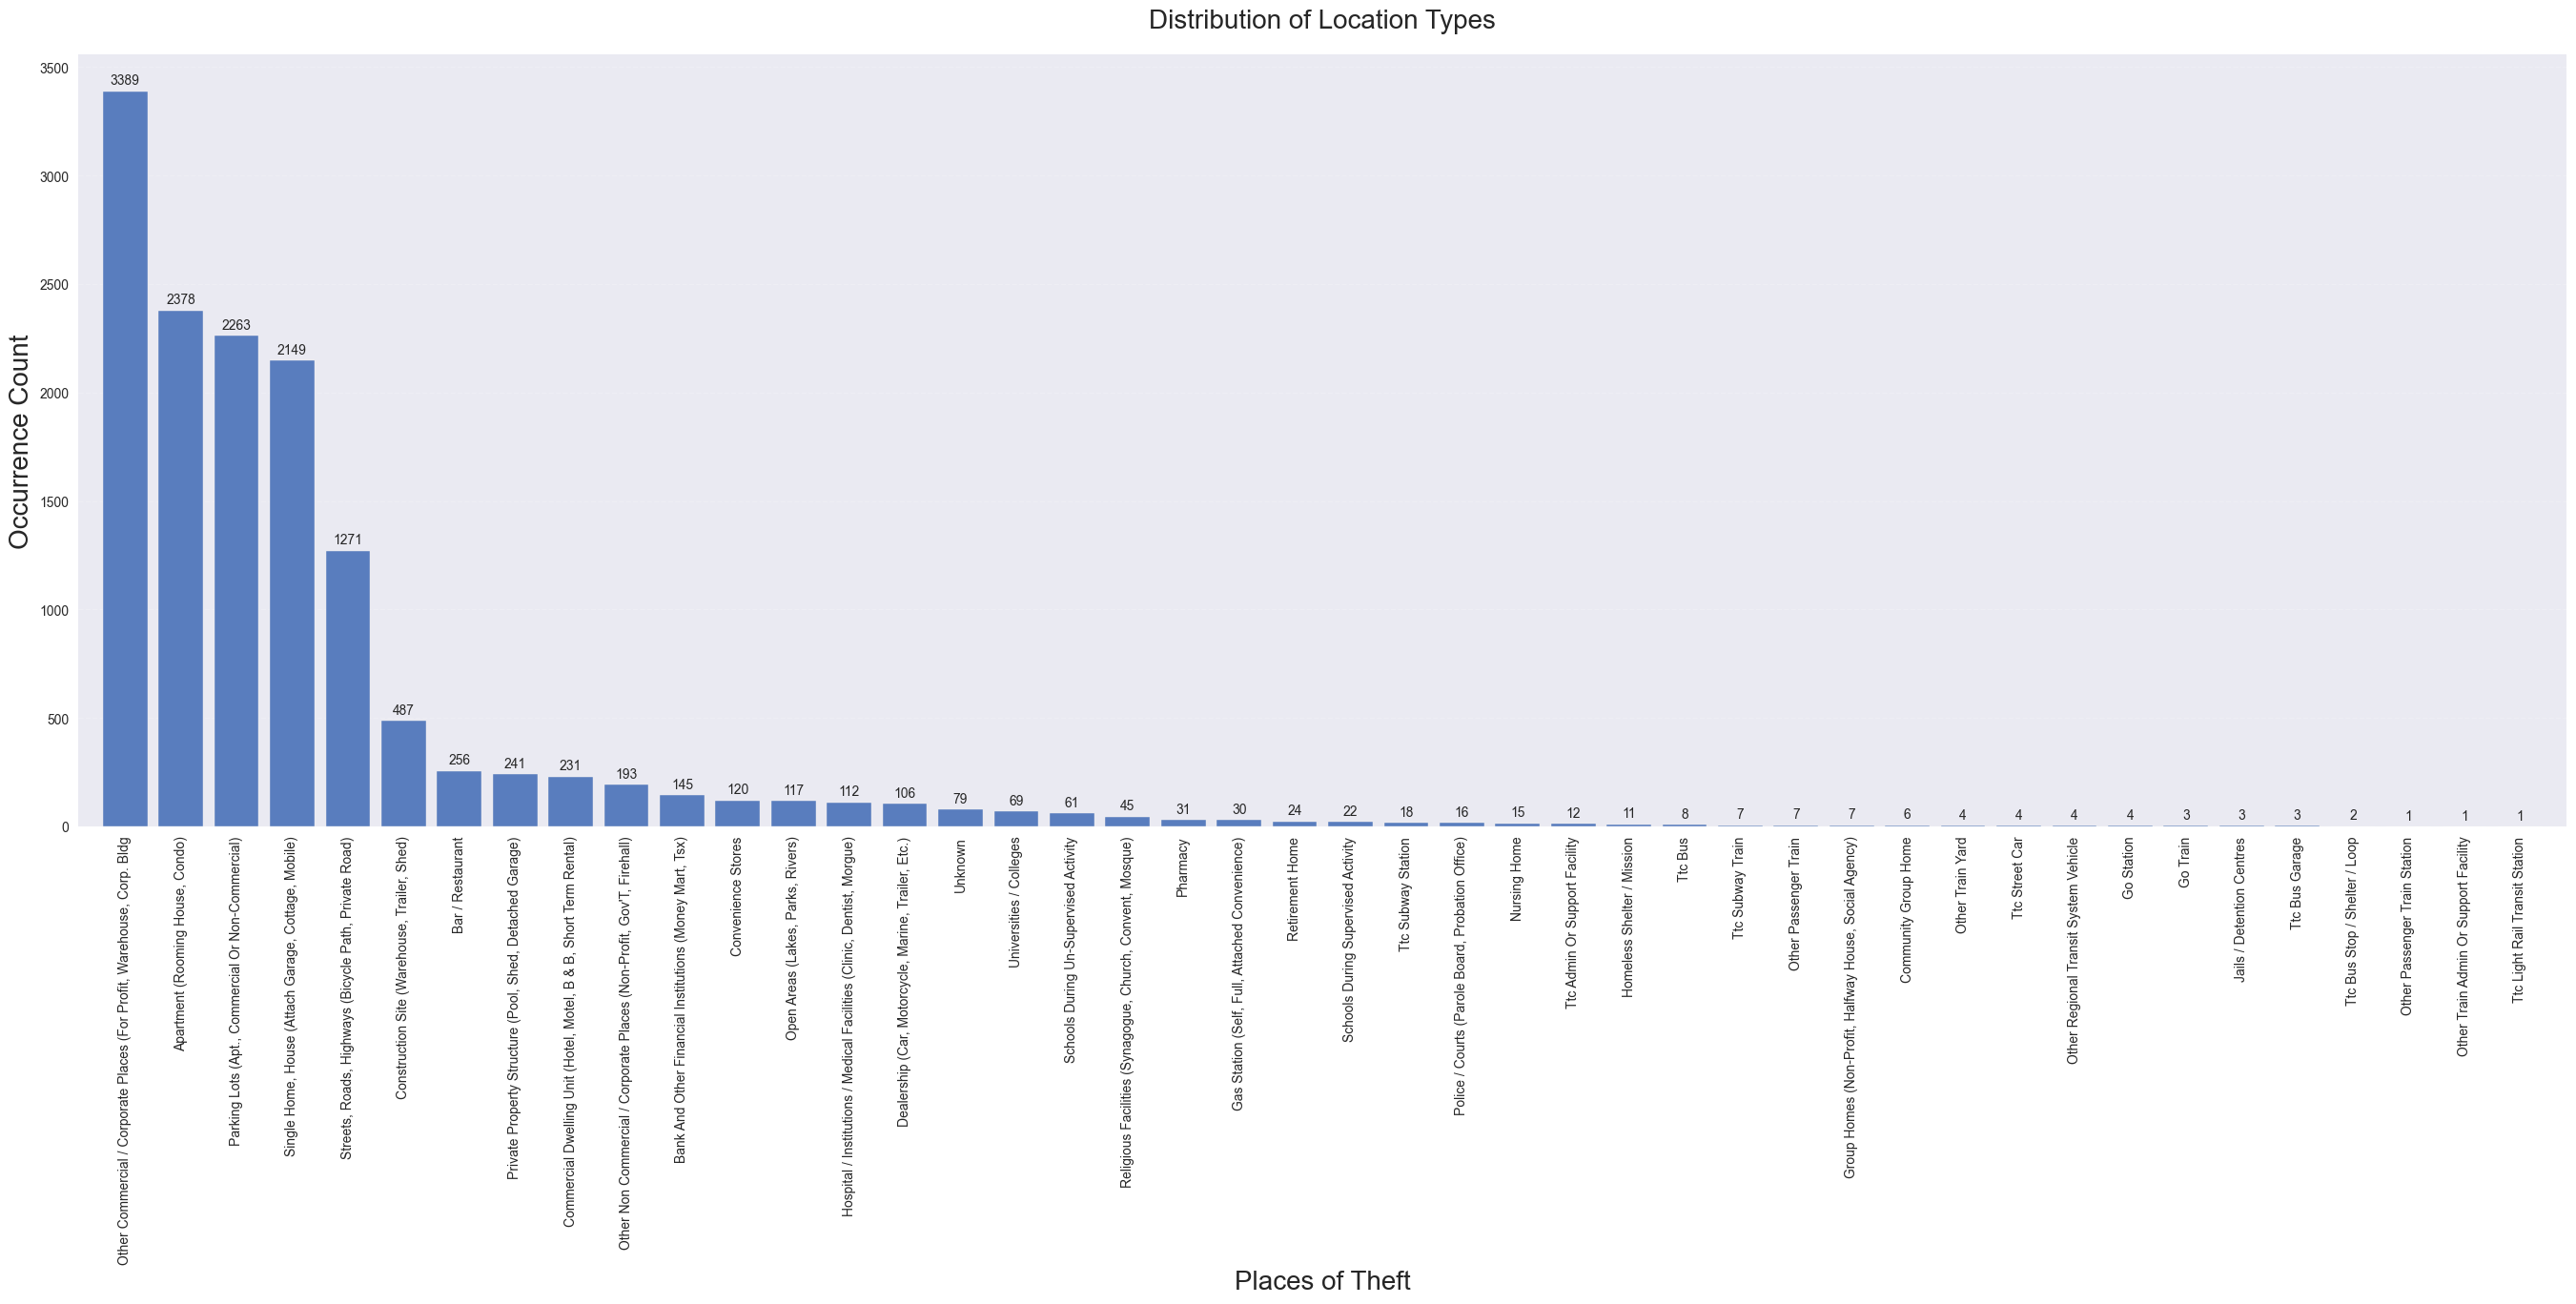

In [75]:
# NOTE: This figure provides a better understanding of the most common places of theft, in which the "Other Commercial / Corporate Places" is the most common at around 2247 occurrences.
plt.style.use("seaborn-v0_8-muted")
plt.figure(figsize=(30, 10))
ax = sns.countplot(data=toodu_df, x="LOCATION_TYPE", order=toodu_df["LOCATION_TYPE"].value_counts().index)
plt.title("Distribution of Location Types", pad=20, size=20)
plt.xlabel("Places of Theft", size=20)
plt.ylabel("Occurrence Count", size=20)
plt.grid(axis="y", linestyle="--", alpha=0.2)
plt.xticks(rotation=90)
plt.margins(x=0.01)

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)
plt.show()

In [54]:
# From the below code, we see that the most common crimes are "Theft" with "Other Theft" being the second most common.
toodu_df["OFFENCE"].value_counts().sort_values(ascending=True)

OFFENCE
Theft Of Utilities Over             8
Theft - Misapprop Funds Over       40
Theft Over - Distraction          169
Theft Over - Bicycle              199
Theft Over - Shoplifting          695
Theft From Mail / Bag / Key      1584
Theft From Motor Vehicle Over    3409
Theft Over                       7852
Name: count, dtype: int64

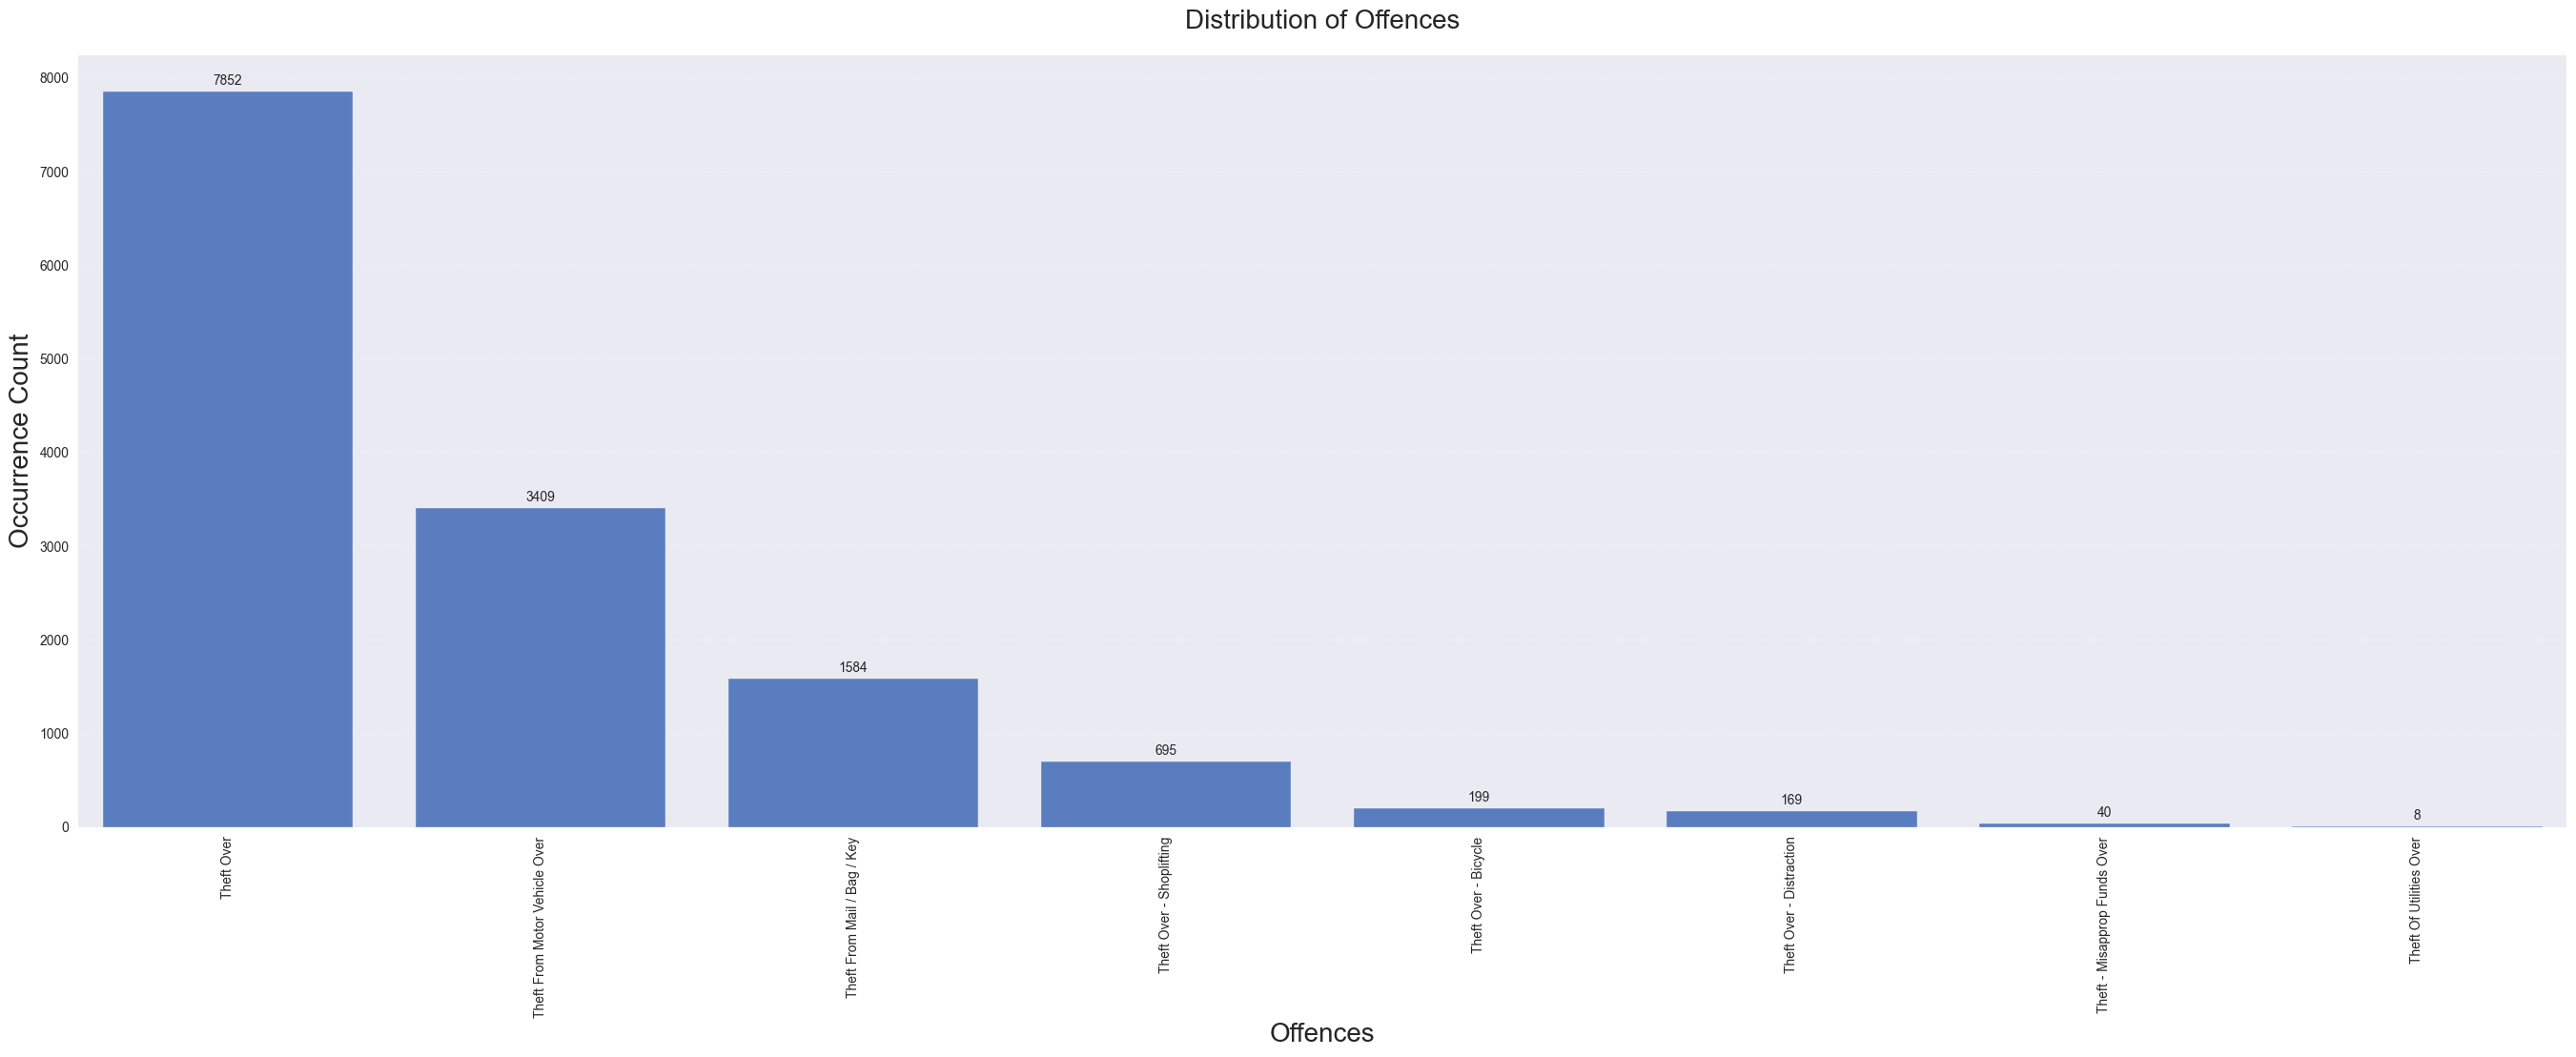

In [64]:
plt.style.use("seaborn-v0_8-muted")
plt.figure(figsize=(30, 10))
ax = sns.countplot(data=toodu_df, x="OFFENCE", order=toodu_df["OFFENCE"].value_counts().index)
plt.title("Distribution of Offences", pad=20, size=20)
plt.xlabel("Offences", size=20)
plt.ylabel("Occurrence Count", size=20)
plt.grid(axis="y", linestyle="--", alpha=0.2)
plt.xticks(rotation=90)
plt.margins(x=0.01)

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)
plt.show()

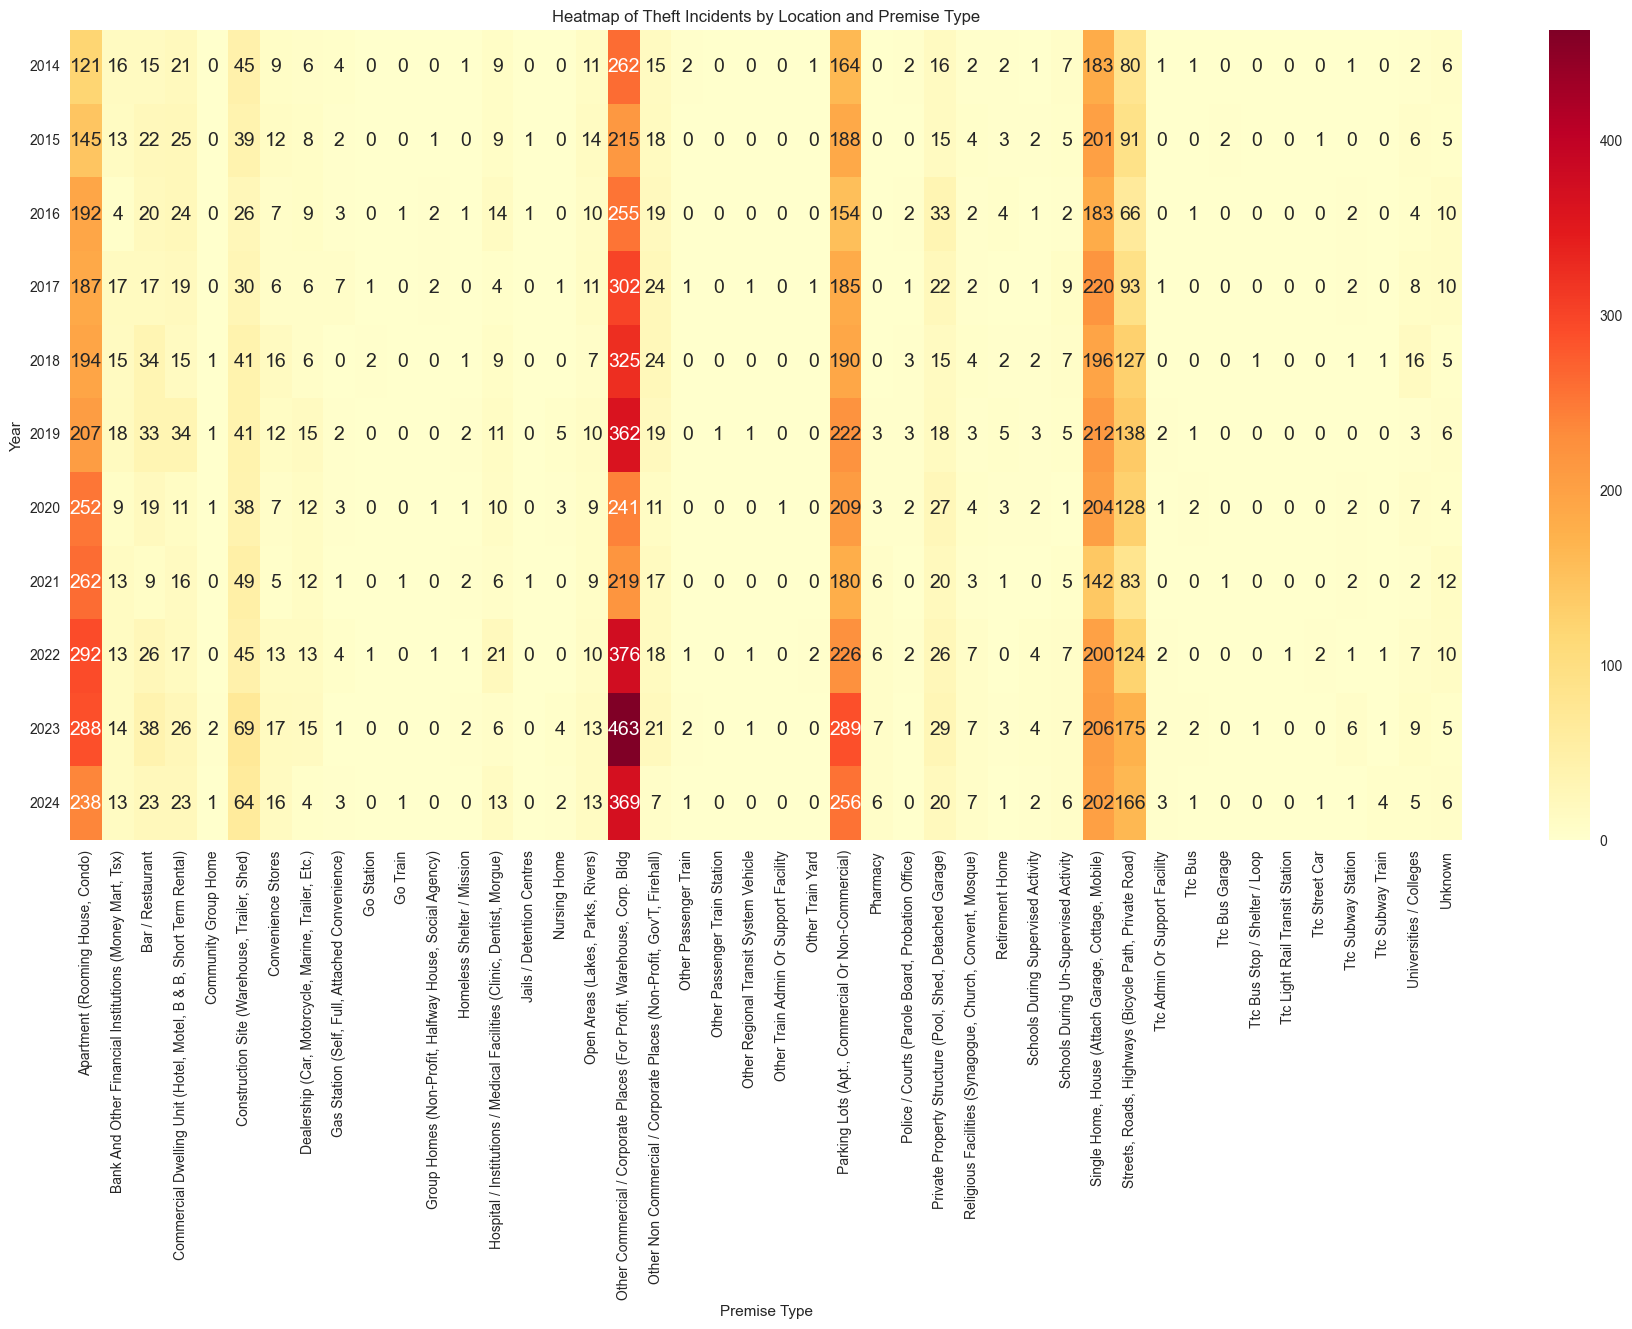

In [73]:
# Exploration Beta: using visualizations to understand the data better.
"""
For this exploration section, we will be using visualizations to understand the data better. We will go over the following:
1. Various heatmap visualizations
2. Geographical clustering visualizations
3. Correlation matrices and confusion matrices
4. Various temporal analysis with visualizations
5. Crime patterns over time with visualizations

Each visualization will be accompanied by a brief explanation of what it is and how its used to understand the data further with some information about the type of visualization that is being used.
"""

# Heatmap of crime patterns by LOCATION_TYPE and PREMISES_TYPE, the darker the color, the more crimes occurred within that Year at that location.
pivot_data = pd.crosstab(toodu_df["REPORT_YEAR"], toodu_df["LOCATION_TYPE"])

plt.figure(figsize=(20, 10))
sns.heatmap(pivot_data, annot=True, cmap="YlOrRd", fmt="d")
plt.title("Heatmap of Theft Incidents by Location and Premise Type")
plt.xlabel("Premise Type")
plt.ylabel("Year")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

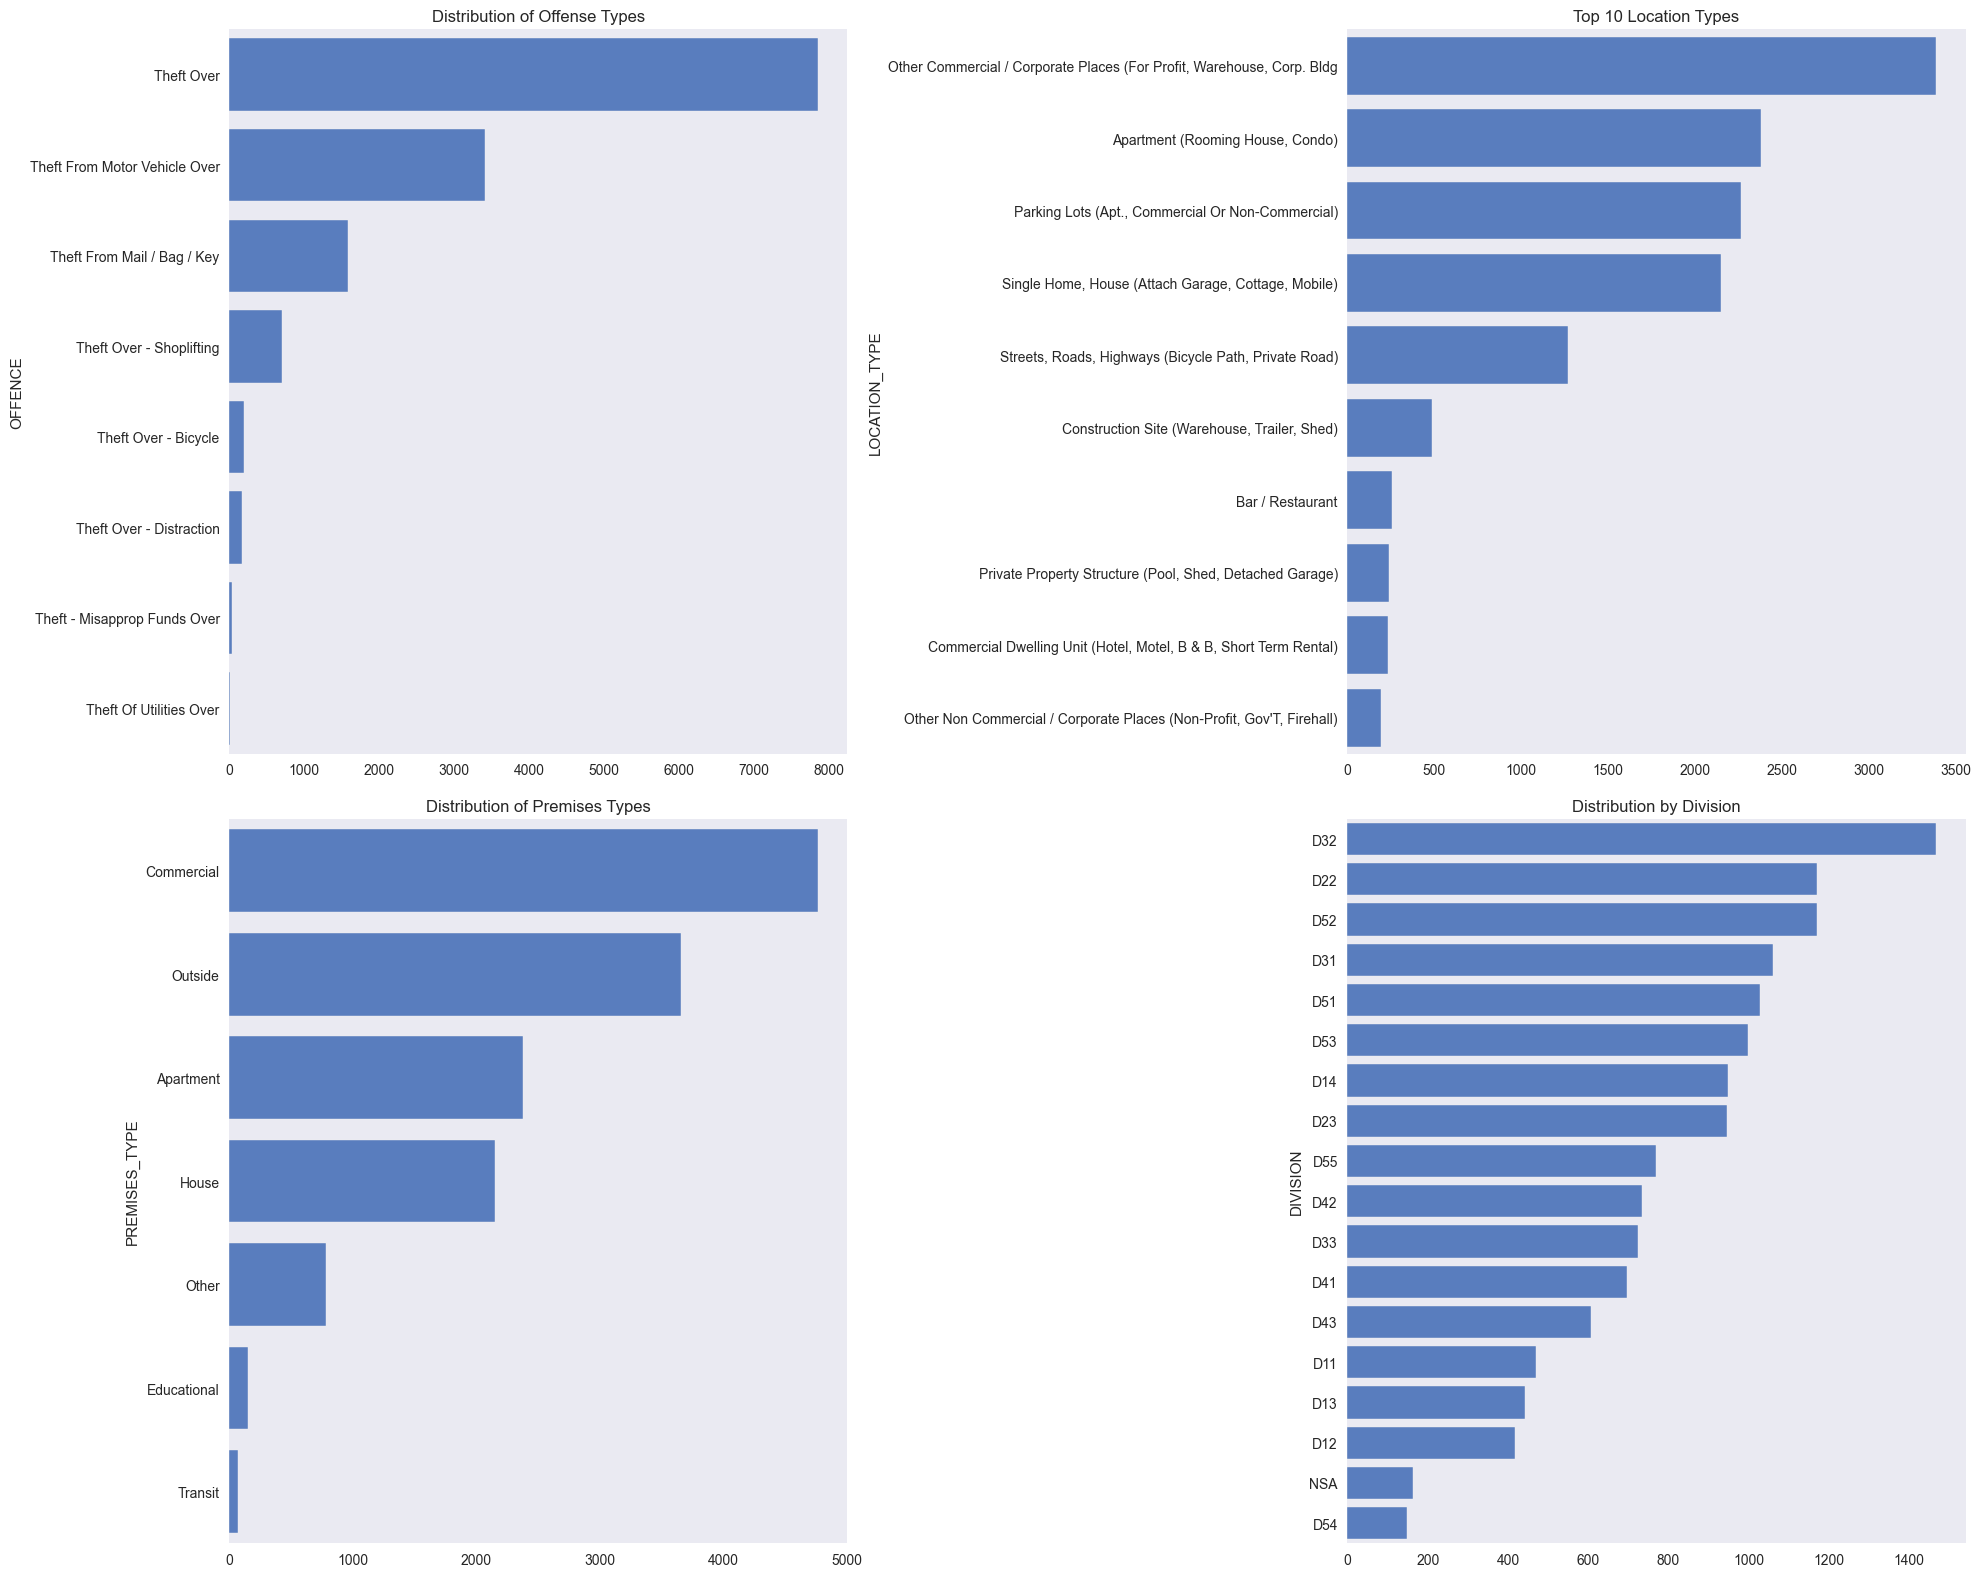

In [74]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# NOTE: This is a barplot of the distribution of offence types (as we have already seen multiple times above most of them aren't category specific just "Theft Over" 5000)
# This might 
offense_counts = toodu_df['OFFENCE'].value_counts()
sns.barplot(x=offense_counts.values, y=offense_counts.index, ax=ax1)
ax1.set_title('Distribution of Offense Types')

# NOTE: This is a barplot of the distribution of location types (top 10 locations compared to the previous barplot above that was a bit harder to read)
location_counts = toodu_df['LOCATION_TYPE'].value_counts()
sns.barplot(x=location_counts.values[:10], y=location_counts.index[:10], ax=ax2)
ax2.set_title('Top 10 Location Types')

# NOTE: This is a barplot of the distribution of premise types (or more simply, the type of place where the theft has occurred)
premises_counts = toodu_df['PREMISES_TYPE'].value_counts()
sns.barplot(x=premises_counts.values, y=premises_counts.index, ax=ax3)
ax3.set_title('Distribution of Premises Types')

# NOTE: This is a barplot of the divisions that were notified the most of theft throughout the years 2014 - 2024.
division_counts = toodu_df['DIVISION'].value_counts()
sns.barplot(x=division_counts.values, y=division_counts.index, ax=ax4)
ax4.set_title('Distribution by Division')

plt.tight_layout()
plt.show()